# Sentiment Analysis

## Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab Notebooks/Licenta/"

Mounted at /content/drive


In [2]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.5 MB/s eta 0:00:00


## Sentiment Analysis Model

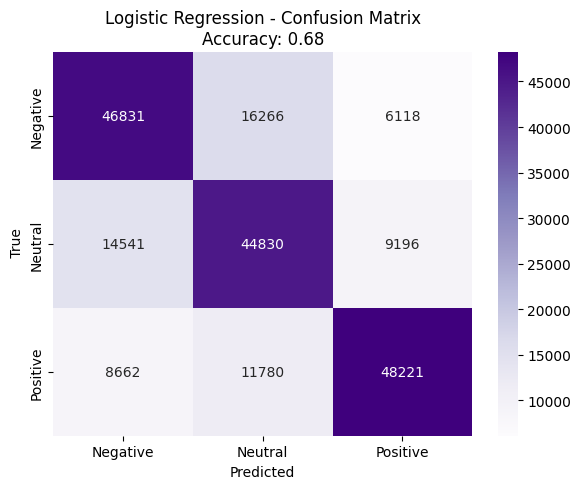

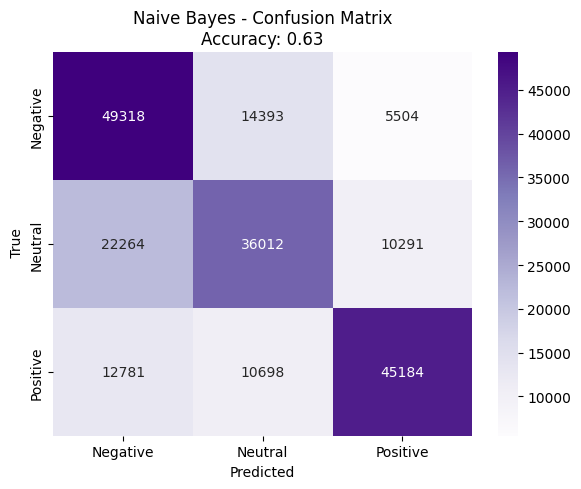

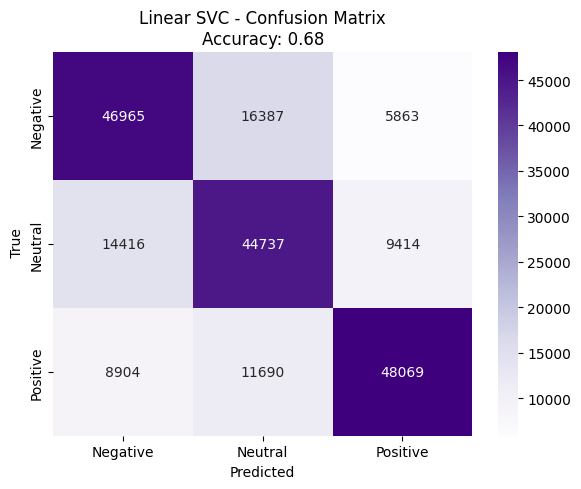

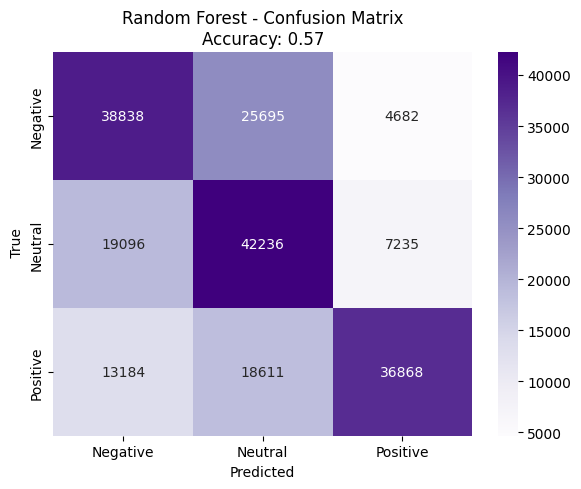

In [3]:
import pandas as pd
import numpy as np
import re
import emoji
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(path+'youtube_comments.csv')

# Preprocessing
def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = emoji.demojize(text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text.strip()

df['cleaned_text'] = df['CommentText'].apply(preprocess_text)
df['label'] = df['Sentiment'].map({'Negative': 0, 'Neutral': 1, 'Positive': 2})
df = df.dropna(subset=['cleaned_text', 'label'])

# Train/test split
X_train, X_valid, y_train, y_valid = train_test_split(
    df['cleaned_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_valid_tfidf = vectorizer.transform(X_valid)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVC": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=30, max_depth=15, n_jobs=-1, random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_valid_tfidf)
    acc = accuracy_score(y_valid, y_pred)
    results[name] = (y_valid, y_pred)

# Confusion matrix
for name, (true, pred) in results.items():
    cm = confusion_matrix(true, pred)
    acc = accuracy_score(true, pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Purples",
        xticklabels=['Negative', 'Neutral', 'Positive'],
        yticklabels=['Negative', 'Neutral', 'Positive']
    )
    plt.title(f'{name} - Confusion Matrix\nAccuracy: {acc:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel(' True')
    plt.tight_layout()
    plt.show()

### 🔍 **1. Logistic Regression**

Logistic Regression achieved an accuracy of **0.6776**, the highest among all models. Its confusion matrix shows a relatively balanced classification across all three sentiment categories (Negative, Neutral, Positive). It correctly predicted:

* **46,831 Negative**, **44,830 Neutral**, and **48,221 Positive** examples.

Misclassifications were moderate, this suggests Logistic Regression is **strong at distinguishing sentiments**, although it sometimes confuses Neutral and Positive tones.

---

### 🧠 **2. Naive Bayes**

Naive Bayes performed the worst among the three classifiers in terms of precision for Neutral and Positive classes, with a lower accuracy of **0.6322**. It predicted:

* **49,318 Negative**, but only **36,012 Neutral**, and **45,184 Positive** correctly.

The model heavily misclassified Neutral comments as either Negative or Positive, indicating that it **struggles with more subtle or ambiguous sentiments**.

---

### ⚖️ **3. Linear SVC**

Linear SVC came very close to Logistic Regression with an accuracy of **0.6770**. It had very similar correct predictions:

* **46,965 Negative**, **44,737 Neutral**, and **48,069 Positive**.

While its performance is strong, the model slightly underperformed compared to Logistic Regression in correctly predicting Positive comments. It’s still a solid choice but offers **no substantial gain over Logistic Regression**.

---

### 🌲 **4. Random Forest**

Random Forest underperformed significantly with an accuracy of **0.5713**. It misclassified a large number of Negative comments as Neutral, and Positive ones as Neutral or Negative:

* Only **36,868 Positive** were correctly identified (vs. 48k+ in others).
* It struggled to separate Neutral from other sentiments.

Random Forest is likely **overfitting due to the high dimensionality** of TF-IDF vectors and a relatively small number of trees. It also lacks efficiency with sparse feature sets like text data.

---

### ✅ **Best Model Choice: Logistic Regression**

**Logistic Regression** is the best-performing model in this case. It has the highest overall accuracy (**67.76%**), good balance across the confusion matrix, and handles text-based features very well when combined with TF-IDF vectorization.

## Input Text

In [ ]:
def test_input_text(input_text):
    cleaned_text = preprocess_text(input_text)
    vectorized_text = vectorizer.transform([cleaned_text])
    prediction = model.predict(vectorized_text)
    sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
    predicted_sentiment = sentiment_map[prediction[0]]

    return predicted_sentiment

# Example usage:
input_text = "👎" #😍
predicted_sentiment = test_input_text(input_text)
print(f"Predicted Sentiment: {predicted_sentiment}")


Predicted Sentiment: Positive


## Save the Model

In [ ]:
import pickle

logistic_model = models["Logistic Regression"]

# Save the trained model
with open('sa_model.pkl', 'wb') as model_file:
    pickle.dump(logistic_model, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Download files to local system
from google.colab import files
files.download('sa_model.pkl')
files.download('tfidf_vectorizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>